#### Objective

To predict if a patient has Parkinson's disease or not

Data is obtained fro UCI at: https://archive.ics.uci.edu/ml/machine-learning-databases/00470/pd_speech_features.rar

Data description can be found at:
https://archive.ics.uci.edu/ml/datasets/Parkinson%27s+Disease+Classification#

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


%matplotlib inline

import seaborn as sns
sns.set

<function seaborn.rcmod.set(*args, **kwargs)>

In [38]:
filepath = pd.read_csv('pd_speech_features.csv')
data = filepath
data.head()

,Unnamed: 0,Unnamed: 1,Baseline Features,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 745,Unnamed: 746,Unnamed: 747,Unnamed: 748,Unnamed: 749,Unnamed: 750,Unnamed: 751,Unnamed: 752,Unnamed: 753,Unnamed: 754
0,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
1,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
2,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
3,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
4,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1


#### Feature Engineering

The second row has to be made the columns

In [39]:
data.columns = data.iloc[0]

data = data.iloc[1:].reset_index(drop=True)

data.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,0,1,0.85247,0.71826,0.57227,240,239,0.00806353,8.68E-05,0.00218,...,1.562,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1
1,0,1,0.76686,0.69481,0.53966,234,233,0.008258256,7.31E-05,0.00195,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.178,1
2,0,1,0.85083,0.67604,0.58982,232,231,0.00833959,6.04E-05,0.00176,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1
3,1,0,0.41121,0.79672,0.59257,178,177,0.010857733,0.000182739,0.00419,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.846,6.265,4.0603,1
4,1,0,0.3279,0.79782,0.53028,236,235,0.008161574,0.002668863,0.00535,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1


In [40]:
data.shape

(756, 755)

In [41]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: object(755)
memory usage: 4.4+ MB


Change dtypes to float

In [42]:
data = data.astype("float64")

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 756 entries, 0 to 755
Columns: 755 entries, id to class
dtypes: float64(755)
memory usage: 4.4 MB


Separate to X and y

In [43]:
y = data['class']
y.head()

0    1.0
1    1.0
2    1.0
3    1.0
4    1.0
Name: class, dtype: float64

In [44]:
X = data.drop('class', axis=1)
X.head()

,id,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,...,tqwt_kurtosisValue_dec_27,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36
0,0.0,1.0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,...,1.5466,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405
1,0.0,1.0,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,...,1.5530,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780
2,0.0,1.0,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,...,1.5399,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666
3,1.0,0.0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,...,6.9761,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603
4,1.0,0.0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,...,7.8832,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164


In [45]:
X = data.drop('id', axis=1)
X.head()

,gender,PPE,DFA,RPDE,numPulses,numPeriodsPulses,meanPeriodPulses,stdDevPeriodPulses,locPctJitter,locAbsJitter,...,tqwt_kurtosisValue_dec_28,tqwt_kurtosisValue_dec_29,tqwt_kurtosisValue_dec_30,tqwt_kurtosisValue_dec_31,tqwt_kurtosisValue_dec_32,tqwt_kurtosisValue_dec_33,tqwt_kurtosisValue_dec_34,tqwt_kurtosisValue_dec_35,tqwt_kurtosisValue_dec_36,class
0,1.0,0.85247,0.71826,0.57227,240.0,239.0,0.008064,0.000087,0.00218,0.000018,...,1.5620,2.6445,3.8686,4.2105,5.1221,4.4625,2.6202,3.0004,18.9405,1.0
1,1.0,0.76686,0.69481,0.53966,234.0,233.0,0.008258,0.000073,0.00195,0.000016,...,1.5589,3.6107,23.5155,14.1962,11.0261,9.5082,6.5245,6.3431,45.1780,1.0
2,1.0,0.85083,0.67604,0.58982,232.0,231.0,0.008340,0.000060,0.00176,0.000015,...,1.5643,2.3308,9.4959,10.7458,11.0177,4.8066,2.9199,3.1495,4.7666,1.0
3,0.0,0.41121,0.79672,0.59257,178.0,177.0,0.010858,0.000183,0.00419,0.000046,...,3.7805,3.5664,5.2558,14.0403,4.2235,4.6857,4.8460,6.2650,4.0603,1.0
4,0.0,0.32790,0.79782,0.53028,236.0,235.0,0.008162,0.002669,0.00535,0.000044,...,6.1727,5.8416,6.0805,5.7621,7.7817,11.6891,8.2103,5.0559,6.1164,1.0


In [46]:
feature_cols = X.columns
feature_cols

Index(['gender', 'PPE', 'DFA', 'RPDE', 'numPulses', 'numPeriodsPulses',
       'meanPeriodPulses', 'stdDevPeriodPulses', 'locPctJitter',
       'locAbsJitter',
       ...
       'tqwt_kurtosisValue_dec_28', 'tqwt_kurtosisValue_dec_29',
       'tqwt_kurtosisValue_dec_30', 'tqwt_kurtosisValue_dec_31',
       'tqwt_kurtosisValue_dec_32', 'tqwt_kurtosisValue_dec_33',
       'tqwt_kurtosisValue_dec_34', 'tqwt_kurtosisValue_dec_35',
       'tqwt_kurtosisValue_dec_36', 'class'],
      dtype='object', name=0, length=754)

In [47]:
X.shape

(756, 754)

In [48]:
y.shape

(756,)

In [49]:
y.value_counts()

1.0    564
0.0    192
Name: class, dtype: int64

Use Strattified shuffle split to split into train and test sets

In [50]:
from sklearn.model_selection import StratifiedShuffleSplit

strat_shuff_split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)

In [51]:
train_idx, test_idx = next(strat_shuff_split.split(data[feature_cols], data['class']))

In [52]:
X_train = data.loc[train_idx, feature_cols]
y_train = data.loc[train_idx, 'class']

X_test = data.loc[test_idx, feature_cols]
y_test =data.loc[test_idx, 'class']

In [53]:
y_train.value_counts(normalize=True)

1.0    0.746692
0.0    0.253308
Name: class, dtype: float64

In [54]:
y_test.value_counts(normalize=True)

1.0    0.744493
0.0    0.255507
Name: class, dtype: float64

In [55]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 529 entries, 307 to 680
Columns: 754 entries, gender to class
dtypes: float64(754)
memory usage: 3.0 MB


In [56]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 227 entries, 321 to 161
Columns: 754 entries, gender to class
dtypes: float64(754)
memory usage: 1.3 MB


Normalizing X data by Scaling

In [57]:
from sklearn.preprocessing import MinMaxScaler

s = MinMaxScaler()

X_train = s.fit_transform(X_train)

X_test = s.transform(X_test)

In [58]:
X_train

array([[1.        , 0.71736814, 0.92883419, ..., 0.05837905, 0.02195277,
        1.        ],
       [1.        , 0.90062452, 0.39412079, ..., 0.72567088, 0.76203783,
        1.        ],
       [0.        , 0.90019732, 0.37907163, ..., 0.03204994, 0.00337507,
        1.        ],
       ...,
       [1.        , 0.90329162, 0.52498161, ..., 0.08209171, 0.03164815,
        1.        ],
       [0.        , 0.91299017, 0.64590997, ..., 0.80798749, 0.76478129,
        1.        ],
       [0.        , 0.91770089, 0.09581299, ..., 0.93866114, 0.78798201,
        1.        ]])

In [59]:
X_test

array([[1.        , 0.9535047 , 0.72613872, ..., 0.14836427, 0.26927205,
        1.        ],
       [1.        , 0.8980036 , 0.58357301, ..., 0.01915446, 0.00433223,
        1.        ],
       [1.        , 0.87748655, 0.33312153, ..., 0.48982137, 0.37274868,
        1.        ],
       ...,
       [0.        , 0.53832601, 0.78666979, ..., 0.03109814, 0.00729951,
        1.        ],
       [1.        , 0.90755205, 0.27881078, ..., 0.72954233, 0.34242903,
        1.        ],
       [0.        , 0.87979573, 0.69406729, ..., 0.0134758 , 0.13270433,
        1.        ]])

In [60]:
y_train = y_train.values

y_test = y_test.values

In [61]:
y_train

array([1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 0., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1.,
       1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 0., 0., 0., 1., 0., 0., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 0.,
       1., 1., 1., 0., 1., 0., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1.,
       0., 1., 1., 0., 0., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1.,
       0., 1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 0., 0., 1., 1.,
       1., 1., 1., 0., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1.,
       1., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       0., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

In [62]:
y_test

array([1., 1., 1., 0., 1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 1., 1., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1.,
       1., 1., 0., 1., 1., 1., 1., 1., 1., 0., 1., 0., 1., 1., 1., 0., 1.,
       1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 0., 1., 0., 0., 0., 0., 1.,
       1., 1., 1., 0., 1., 1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 1., 1.,
       1., 0., 1., 1., 0., 1., 1., 0., 0., 0., 1., 1., 1., 0., 1., 1., 0.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 0., 0., 1., 1., 1., 1., 1., 0., 1., 1., 0., 1., 1., 1.,
       1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 1., 1., 1., 0., 1.,
       1., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 1.,
       0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 0., 0., 1., 0., 0., 0.,
       0., 1., 1., 1., 1., 1., 1., 1., 0., 1., 1., 1., 1., 0., 1., 1., 0.,
       0., 0., 1., 1., 1., 1., 0., 1., 1., 0., 1., 0., 1., 1., 0., 0., 1.,
       1., 1., 1., 1., 1.

#### Modelling

In [78]:
from tensorflow.keras.models  import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.optimizers import Adam, SGD, RMSprop

In [146]:
model_1 = Sequential([
    Dense(754, activation='relu', input_shape = (754,)),
    Dense(754, activation='relu'),
    Dense(754, activation='relu'),
    Dense(1,activation='sigmoid')
])


In [147]:
Model_1.compile(optimizer=SGD(lr = .003),
               loss="binary_crossentropy",
               metrics=['accuracy'])

In [148]:
history = Model_1.fit(X_train, y_train,
                   batch_size=75,
                   epochs=100,
                   validation_data=(X_test,y_test))

Epoch 1/100
8/8 [==============================] - 1s 102ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 2/100
8/8 [==============================] - 0s 28ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 3/100
8/8 [==============================] - 0s 26ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 4/100
8/8 [==============================] - 0s 26ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 5/100
8/8 [==============================] - 0s 27ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 6/100
8/8 [==============================] - 0s 28ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 7/100
8/8 [==============================] - 0s 26ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 8/100
8/8 [==

8/8 [==============================] - 0s 33ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 60/100
8/8 [==============================] - 0s 28ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 61/100
8/8 [==============================] - 0s 24ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 62/100
8/8 [==============================] - 0s 27ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 63/100
8/8 [==============================] - 0s 28ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 64/100
8/8 [==============================] - 0s 28ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 65/100
8/8 [==============================] - 0s 32ms/step - loss: 2.6794 - accuracy: 0.0888 - val_loss: 2.7377 - val_accuracy: 0.0441
Epoch 66/100
8/8 [========

In [149]:
Model_1.evaluate(X_test,y_test)

8/8 [==============================] - 0s 7ms/step - loss: 2.7377 - accuracy: 0.0441


[2.7377395629882812, 0.044052861630916595]

The accuracy is low.


Visualize the loss and accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

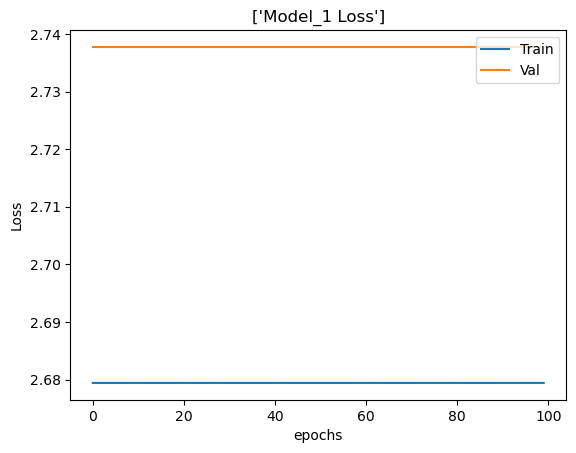

In [150]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='upper right')
plt.title(["Model_1 Loss"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

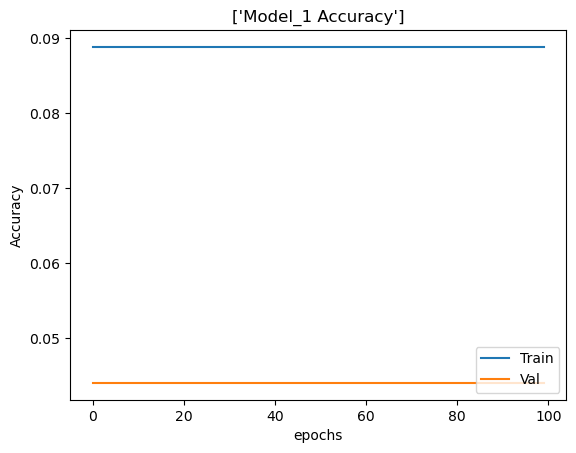

In [151]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='lower right')
plt.title(["Model_1 Accuracy"])
plt.show

The distance between the test and training loss is too wide. Thus a poor model. Therefore another model is built.

In [113]:
Model_2 = Sequential([
    Dense(2000, activation='relu', input_shape = (754,)),
    Dense(2000, activation='relu'),
    Dense(2000, activation='relu'),
    Dense(2000, activation='relu'),
    Dense(1,activation='sigmoid')
])


Model_2.compile(optimizer=Adam(learning_rate=0.003),
               loss="binary_crossentropy",
               metrics=['accuracy'])

history_2 = Model_2.fit(X_train, y_train,
                   batch_size=50,
                   epochs=100,
                   validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 9s 403ms/step - loss: 5.4241 - accuracy: 0.6522 - val_loss: 0.5224 - val_accuracy: 0.7445
Epoch 2/100
11/11 [==============================] - 3s 262ms/step - loss: 0.4960 - accuracy: 0.7656 - val_loss: 0.7307 - val_accuracy: 0.7753
Epoch 3/100
11/11 [==============================] - 3s 249ms/step - loss: 0.4282 - accuracy: 0.8299 - val_loss: 0.3628 - val_accuracy: 0.8590
Epoch 4/100
11/11 [==============================] - 3s 243ms/step - loss: 0.3349 - accuracy: 0.8658 - val_loss: 0.3459 - val_accuracy: 0.8370
Epoch 5/100
11/11 [==============================] - 3s 243ms/step - loss: 0.2568 - accuracy: 0.8979 - val_loss: 0.2831 - val_accuracy: 0.8722
Epoch 6/100
11/11 [==============================] - 3s 246ms/step - loss: 0.2251 - accuracy: 0.9149 - val_loss: 0.1810 - val_accuracy: 0.9427
Epoch 7/100
11/11 [==============================] - 3s 246ms/step - loss: 0.1725 - accuracy: 0.9376 - val_loss: 0.2915 - val_accuracy: 0.8678

Epoch 57/100
11/11 [==============================] - 3s 246ms/step - loss: 6.6361e-07 - accuracy: 1.0000 - val_loss: 0.0725 - val_accuracy: 0.9912
Epoch 58/100
11/11 [==============================] - 3s 242ms/step - loss: 5.9667e-07 - accuracy: 1.0000 - val_loss: 0.0734 - val_accuracy: 0.9912
Epoch 59/100
11/11 [==============================] - 3s 242ms/step - loss: 5.4262e-07 - accuracy: 1.0000 - val_loss: 0.0742 - val_accuracy: 0.9912
Epoch 60/100
11/11 [==============================] - 3s 243ms/step - loss: 5.0232e-07 - accuracy: 1.0000 - val_loss: 0.0748 - val_accuracy: 0.9912
Epoch 61/100
11/11 [==============================] - 3s 242ms/step - loss: 4.6022e-07 - accuracy: 1.0000 - val_loss: 0.0756 - val_accuracy: 0.9912
Epoch 62/100
11/11 [==============================] - 3s 242ms/step - loss: 4.2157e-07 - accuracy: 1.0000 - val_loss: 0.0767 - val_accuracy: 0.9912
Epoch 63/100
11/11 [==============================] - 3s 242ms/step - loss: 3.9017e-07 - accuracy: 1.0000 - val_

In [114]:
Model_2.evaluate(X_test,y_test)

8/8 [==============================] - 1s 66ms/step - loss: 0.0900 - accuracy: 0.9912


[0.09001632779836655, 0.9911894202232361]

This is an improved model with higher accuracy of 99.12%

<function matplotlib.pyplot.show(close=None, block=None)>

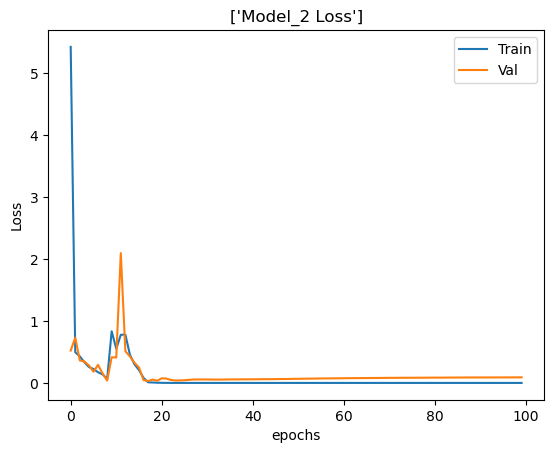

In [115]:
plt.plot(history_2.history['loss'])
plt.plot(history_2.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='upper right')
plt.title(["Model_2 Loss"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

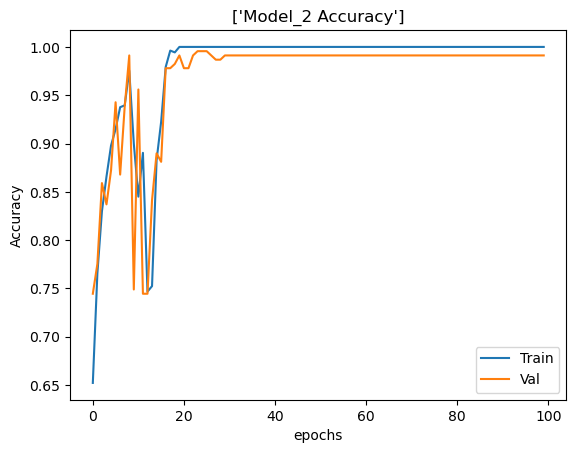

In [116]:
plt.plot(history_2.history['accuracy'])
plt.plot(history_2.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='lower right')
plt.title(["Model_2 Accuracy"])
plt.show

It can be seen that increasing the number of neurons in each layer and using the "Adam' optimizer geatly improved the accuracy of the model.

However, it would be interesting to see what will happen if the number of neurons is increased with the addition of dropout and L2(Ridge) regularization to the model 

In [121]:
from tensorflow.keras import regularizers

In [137]:
Model_3 = Sequential([
    Dense(3000, activation='relu', kernel_regularizer='l2', input_shape = (754,)),
    Dropout(0.3), 
    Dense(3000, activation='relu',kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(3000, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(3000, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])


Model_3.compile(optimizer=Adam(learning_rate=0.003),
               loss="binary_crossentropy",
               metrics=['accuracy'])

history_3 = Model_3.fit(X_train, y_train,
                   batch_size=50,
                   epochs=100,
                   validation_data=(X_test,y_test))

Epoch 1/100
11/11 [==============================] - 13s 706ms/step - loss: 49.1749 - accuracy: 0.6333 - val_loss: 19.1204 - val_accuracy: 0.7445
Epoch 2/100
11/11 [==============================] - 7s 650ms/step - loss: 17.7455 - accuracy: 0.7467 - val_loss: 13.8311 - val_accuracy: 0.7445
Epoch 3/100
11/11 [==============================] - 7s 639ms/step - loss: 10.4112 - accuracy: 0.7467 - val_loss: 7.4046 - val_accuracy: 0.7445
Epoch 4/100
11/11 [==============================] - 7s 630ms/step - loss: 6.0608 - accuracy: 0.7467 - val_loss: 4.5862 - val_accuracy: 0.7445
Epoch 5/100
11/11 [==============================] - 7s 637ms/step - loss: 3.6797 - accuracy: 0.7467 - val_loss: 2.8209 - val_accuracy: 0.7445
Epoch 6/100
11/11 [==============================] - 7s 634ms/step - loss: 2.4629 - accuracy: 0.7467 - val_loss: 2.0003 - val_accuracy: 0.7445
Epoch 7/100
11/11 [==============================] - 7s 613ms/step - loss: 1.7030 - accuracy: 0.7467 - val_loss: 1.4378 - val_accuracy: 

Epoch 58/100
11/11 [==============================] - 6s 559ms/step - loss: 0.1890 - accuracy: 0.9943 - val_loss: 0.1782 - val_accuracy: 0.9956
Epoch 59/100
11/11 [==============================] - 6s 557ms/step - loss: 0.1856 - accuracy: 0.9943 - val_loss: 0.1613 - val_accuracy: 1.0000
Epoch 60/100
11/11 [==============================] - 6s 554ms/step - loss: 0.1747 - accuracy: 0.9962 - val_loss: 0.1655 - val_accuracy: 0.9956
Epoch 61/100
11/11 [==============================] - 6s 550ms/step - loss: 0.1833 - accuracy: 0.9924 - val_loss: 0.1531 - val_accuracy: 1.0000
Epoch 62/100
11/11 [==============================] - 6s 554ms/step - loss: 0.1709 - accuracy: 0.9943 - val_loss: 0.1618 - val_accuracy: 0.9912
Epoch 63/100
11/11 [==============================] - 6s 559ms/step - loss: 0.1604 - accuracy: 0.9962 - val_loss: 0.1428 - val_accuracy: 1.0000
Epoch 64/100
11/11 [==============================] - 6s 554ms/step - loss: 0.1572 - accuracy: 0.9943 - val_loss: 0.1490 - val_accuracy:

In [138]:
Model_3.evaluate(X_test,y_test)

8/8 [==============================] - 1s 109ms/step - loss: 0.1570 - accuracy: 1.0000


[0.15700553357601166, 1.0]

We see a perfect accuracy

<function matplotlib.pyplot.show(close=None, block=None)>

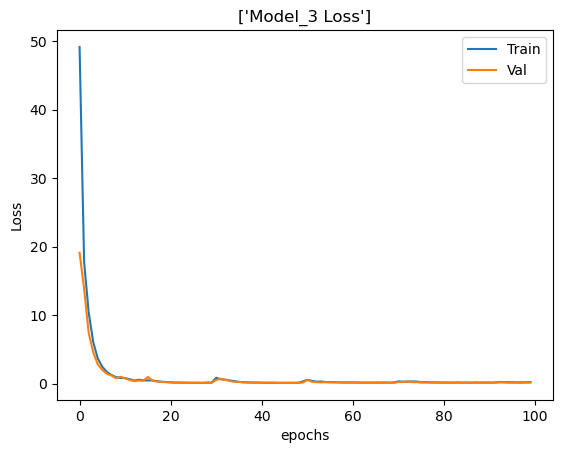

In [139]:
plt.plot(history_3.history['loss'])
plt.plot(history_3.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='upper right')
plt.title(["Model_3 Loss"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

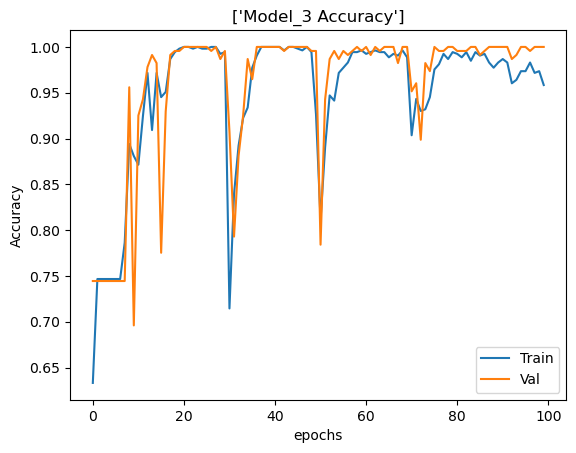

In [140]:
plt.plot(history_3.history['accuracy'])
plt.plot(history_3.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='lower right')
plt.title(["Model_3 Accuracy"])
plt.show

We see that the validation accuracy is higher.

To be on the safe side, the number of neurons is reduced back to 2000 while using L2 regularization and dropout

In [155]:
Model_4 = Sequential([
    Dense(2000, activation='relu', kernel_regularizer='l2', input_shape = (754,)),
    Dropout(0.3), 
    Dense(2000, activation='relu',kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(2000, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(2000, activation='relu', kernel_regularizer='l2'),
    Dropout(0.3),
    Dense(1,activation='sigmoid')
])


Model_4.compile(optimizer=Adam(learning_rate=0.003),
               loss="binary_crossentropy",
               metrics=['accuracy'])

history_4 = Model_3.fit(X_train, y_train,
                   batch_size=50,
                   epochs=50,
                   validation_data=(X_test,y_test))

Epoch 1/50
11/11 [==============================] - 7s 605ms/step - loss: 0.4379 - accuracy: 0.7467 - val_loss: 0.3000 - val_accuracy: 0.7445
Epoch 2/50
11/11 [==============================] - 6s 588ms/step - loss: 0.4100 - accuracy: 0.7675 - val_loss: 0.2452 - val_accuracy: 1.0000
Epoch 3/50
11/11 [==============================] - 7s 609ms/step - loss: 0.3843 - accuracy: 0.8166 - val_loss: 0.2568 - val_accuracy: 0.8943
Epoch 4/50
11/11 [==============================] - 7s 603ms/step - loss: 0.3991 - accuracy: 0.8204 - val_loss: 0.2199 - val_accuracy: 1.0000
Epoch 5/50
11/11 [==============================] - 7s 600ms/step - loss: 0.4091 - accuracy: 0.8336 - val_loss: 0.2353 - val_accuracy: 0.9868
Epoch 6/50
11/11 [==============================] - 7s 593ms/step - loss: 0.4931 - accuracy: 0.7486 - val_loss: 0.3836 - val_accuracy: 0.7445
Epoch 7/50
11/11 [==============================] - 6s 564ms/step - loss: 0.4272 - accuracy: 0.8261 - val_loss: 0.2655 - val_accuracy: 0.9295
Epoch 

In [159]:
Model_4.evaluate(X_test,y_test)

8/8 [==============================] - 1s 72ms/step - loss: 71.6701 - accuracy: 0.2467


[71.67008972167969, 0.24669604003429413]

<function matplotlib.pyplot.show(close=None, block=None)>

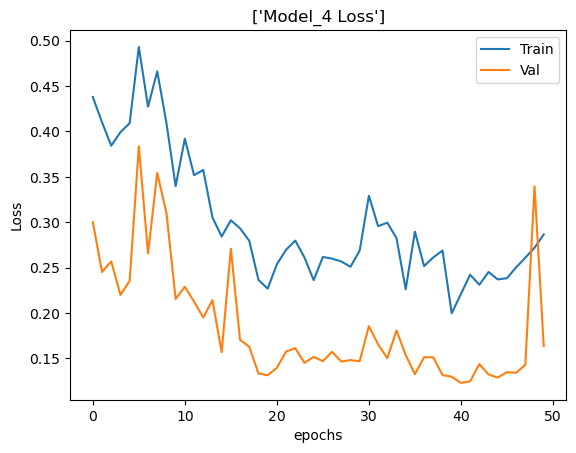

In [157]:
plt.plot(history_4.history['loss'])
plt.plot(history_4.history['val_loss'])
plt.ylabel("Loss")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='upper right')
plt.title(["Model_4 Loss"])
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

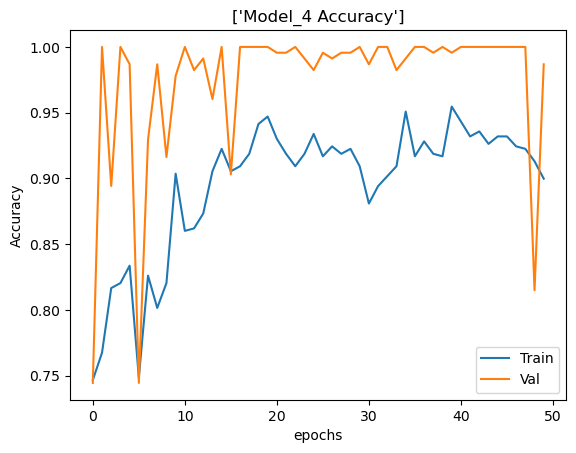

In [158]:
plt.plot(history_4.history['accuracy'])
plt.plot(history_4.history['val_accuracy'])
plt.ylabel("Accuracy")
plt.xlabel('epochs')
plt.legend(['Train', "Val"], loc='lower right')
plt.title(["Model_4 Accuracy"])
plt.show

We see the validation loss is lower than training loss and training accuracy is greater than training accuracy.

This is unual; normally, the validation accuracy on the test is usually a bit lower or at the same as the train. To be sure, a larger portion of data can be allocated to the test set. 

A suggestion is that a test set should be separated from the validation set before modelling. Then the final model should be run on the test set.

